In [71]:
import os
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials

os.chdir("..")

from repositories.income_statement import IncomeStatementRepository
from repositories.balance_sheet import BalanceSheetRepository
from repositories.cash_flow import CashFlowRepository
from repositories.earnings import EarningsRepository

In [2]:
conn = sqlite3.connect('data/stockup.db')
income_statement_repo = IncomeStatementRepository(conn)
balance_sheet_repo = BalanceSheetRepository(conn)
cash_flow_repo = CashFlowRepository(conn)
earnings_repo = EarningsRepository(conn)

In [3]:
income_data = income_statement_repo.find_all_sync(limit=1_000_000)
balance_data = balance_sheet_repo.find_all_sync(limit=1_000_000)
cash_data = cash_flow_repo.find_all_sync(limit=1_000_000)
earnings_data = earnings_repo.find_all_sync(limit=1_000_000)

In [4]:
income_df = pd.DataFrame(income_data)
income_df.sample(10)

,symbol,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,report_type
359,RTC,2018-09-30,0,1.706000e+07,8.687200e+07,69812000.0,6.981200e+07,-774000.0,14874000.0,0.0,...,11278000.0,-1863000.0,-15000.0,0.0,0.0,0.0,906000.0,12184000.0,-1848000.0,quarterlyReports
2477,EQX,2019-03-31,USD,9.876000e+06,3.538500e+07,25509000.0,2.550900e+07,3840000.0,3035000.0,0.0,...,4720000.0,-3481000.0,2310000.0,0.0,-5791000.0,0.0,4534000.0,9254000.0,-4909000.0,quarterlyReports
1914,AGEN,2023-03-31,USD,2.060800e+07,2.290200e+07,2294000.0,5.941200e+07,-54341000.0,18237000.0,57118000.0,...,2562000.0,-70893000.0,-3045000.0,0.0,-54301000.0,-68252000.0,-54341000.0,-51779000.0,-68254000.0,quarterlyReports
1509,ARL,2019-09-30,USD,5.858000e+06,1.323100e+07,6085000.0,5.883000e+06,-578000.0,2669000.0,0.0,...,3416000.0,-9450000.0,-1879000.0,15639000.0,-9450000.0,-6147000.0,-578000.0,2838000.0,-7571000.0,quarterlyReports
1212,CHRD,2018-12-31,USD,1.669370e+09,2.177601e+09,508231000.0,0.000000e+00,119012000.0,121346000.0,0.0,...,0.0,-41139000.0,-5843000.0,172933000.0,-19500000.0,-35296000.0,117946000.0,0.0,-35296000.0,annualReports
3078,QURE,2023-06-30,USD,-2.392300e+07,2.422000e+06,21181000.0,1.352000e+06,-65074000.0,21181000.0,46036000.0,...,2588000.0,-68311000.0,163000.0,6840000.0,-68474000.0,-68420000.0,-65074000.0,-58883000.0,-68474000.0,quarterlyReports
137,AAMC,2022-09-30,USD,-1.237000e+06,1.906000e+06,3143000.0,1.563000e+03,-5428000.0,784000.0,0.0,...,117000.0,-3840000.0,146000.0,435000.0,-3986000.0,-3996000.0,-3405000.0,-3288000.0,-3986000.0,quarterlyReports
1722,AMR,2018-12-31,USD,1.924824e+09,2.031205e+09,106381000.0,1.661118e+09,193760000.0,59271000.0,0.0,...,72157000.0,133802000.0,-165363000.0,38810000.0,302854000.0,277983000.0,172612000.0,311744000.0,299165000.0,annualReports
3877,CD,2021-06-30,CNY,2.787720e+08,6.863980e+08,407626000.0,4.076260e+08,148226000.0,86510000.0,20823000.0,...,143875000.0,99348000.0,34199000.0,0.0,65149000.0,0.0,171911000.0,315786000.0,65149000.0,quarterlyReports
4078,AGS,2023-03-31,USD,4.364500e+07,6.947100e+07,25826000.0,2.408900e+07,11746000.0,17205000.0,10789000.0,...,8500000.0,-1523000.0,-1189000.0,13704000.0,-334000.0,3079000.0,12181000.0,20681000.0,-334000.0,quarterlyReports


In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4193 entries, 0 to 4192
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   symbol                             4193 non-null   object 
 1   fiscalDateEnding                   4193 non-null   object 
 2   reportedCurrency                   4193 non-null   object 
 3   grossProfit                        4193 non-null   float64
 4   totalRevenue                       4193 non-null   float64
 5   costOfRevenue                      4193 non-null   float64
 6   costofGoodsAndServicesSold         4193 non-null   float64
 7   operatingIncome                    4193 non-null   float64
 8   sellingGeneralAndAdministrative    4193 non-null   float64
 9   researchAndDevelopment             4193 non-null   float64
 10  operatingExpenses                  4193 non-null   float64
 11  investmentIncomeNet                4193 non-null   float

In [6]:
income_df.describe()

,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,netInterestIncome,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
count,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,...,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03,4.193000e+03
mean,1.530791e+09,3.912154e+09,2.393774e+09,2.233084e+09,4.511492e+08,3.645445e+08,9.111492e+07,6.869085e+08,7.404555e+06,1.328866e+07,...,2.027097e+07,2.400416e+08,3.025194e+08,1.779268e+09,3.608131e+07,2.442974e+08,8.494646e+07,3.570753e+08,6.217631e+08,2.306564e+08
std,9.282507e+09,2.357276e+10,1.733158e+10,1.720093e+10,3.141043e+09,2.263553e+09,8.078510e+08,3.145610e+09,8.659777e+07,1.208470e+09,...,1.145207e+08,2.267502e+09,2.616732e+09,7.408691e+10,1.386129e+08,2.199907e+09,9.511883e+08,2.680528e+09,4.675184e+09,2.073865e+09
min,-2.007310e+10,-9.649335e+08,-1.433252e+09,-3.031700e+10,-3.241200e+10,-2.287000e+09,-9.809200e+07,-4.668000e+09,-3.906280e+08,-1.070200e+10,...,-2.216000e+07,-7.140000e+09,-1.366334e+10,-8.084000e+09,-3.890000e+08,-1.990100e+10,-1.553400e+10,-1.739400e+10,-1.339719e+10,-1.365953e+10
25%,2.600000e+04,5.345827e+06,5.545000e+06,3.595830e+05,-1.056100e+07,2.988000e+06,0.000000e+00,6.228000e+06,0.000000e+00,-1.817500e+07,...,0.000000e+00,1.810000e+05,-1.236500e+07,-8.152300e+04,0.000000e+00,-1.151298e+07,-6.462982e+06,-8.900000e+06,-5.109860e+06,-1.216600e+07
50%,2.820200e+07,1.110040e+08,4.689900e+07,3.599200e+07,8.630000e+02,1.737800e+07,0.000000e+00,4.245911e+07,0.000000e+00,-3.210000e+05,...,0.000000e+00,3.573000e+06,2.100000e+05,1.233310e+05,3.000000e+04,0.000000e+00,0.000000e+00,2.260000e+05,4.619343e+06,1.944530e+05
75%,3.335610e+08,8.690730e+08,4.297976e+08,3.972410e+08,6.788200e+07,1.085110e+08,8.061000e+06,2.354070e+08,3.500000e+04,0.000000e+00,...,2.547020e+05,3.200000e+07,5.399100e+07,8.055000e+06,1.128782e+07,3.782400e+07,1.876061e+07,6.830000e+07,1.263000e+08,4.343400e+07
max,2.392770e+11,6.708730e+11,5.359430e+11,5.359430e+11,8.017600e+10,4.778200e+10,2.437000e+10,5.374010e+10,2.324000e+09,3.261000e+10,...,2.370000e+09,7.508700e+10,8.162600e+10,3.379401e+12,2.092000e+09,6.601400e+10,1.711100e+10,8.017600e+10,1.387640e+11,6.390800e+10


In [7]:
annual_income_statements = income_df[income_df['report_type'] == 'annualReports' ]
quarterly_income_statements = income_df[income_df['report_type'] == 'quarterlyReports' ]

In [8]:
MTC_stock_annual_income_statements = annual_income_statements[annual_income_statements['symbol'] == 'MTC'].sort_values(by = ['fiscalDateEnding'])
MTC_stock_annual_income_statements

,symbol,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,report_type
666,MTC,2018-12-31,USD,10574.0,26882.0,16308.0,16308.0,-2327540.0,2167098.0,0.0,...,27311.0,-2349002.0,-21450.0,0.0,-2349002.0,0.0,-2389955.0,-2362644.0,-2349002.0,annualReports
665,MTC,2019-12-31,USD,109907.0,200797.0,90890.0,90890.0,-2215981.0,2660933.0,0.0,...,-1198.0,-2243234.0,-64407.0,0.0,-2243234.0,0.0,-2215981.0,-2217179.0,-2178827.0,annualReports
664,MTC,2020-12-31,USD,734720.0,742125.0,7405.0,7405.0,-3184151.0,3674708.0,0.0,...,92595.0,-3181596.0,7541.0,0.0,-3181596.0,0.0,-3184151.0,-3091556.0,-3189137.0,annualReports
663,MTC,2021-12-31,USD,511734.0,653036.0,141302.0,141302.0,-5933184.0,6141839.0,0.0,...,1214133.0,-7050755.0,1172345.0,0.0,-7050755.0,0.0,-5933184.0,-4719051.0,-8223100.0,annualReports
662,MTC,2022-12-31,USD,868049.0,1099133.0,231084.0,231084.0,-5792615.0,5653012.0,0.0,...,19927.0,-5645376.0,-193740.0,0.0,-5645376.0,0.0,-5792615.0,-5772688.0,-5451636.0,annualReports


In [9]:
MTC_stock_quarterly_income_statements = quarterly_income_statements[quarterly_income_statements['symbol'] == 'MTC'].sort_values(by = ['fiscalDateEnding'])
MTC_stock_quarterly_income_statements.sample(5)

,symbol,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,...,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,report_type
680,MTC,2019-06-30,USD,111320.0,177540.0,66220.0,66220.0,-1308590.0,1419910.0,0.0,...,10320.0,-1326940.0,-36590.0,0.0,-663471.0,0.0,-1345180.0,-1334860.0,-1326940.0,quarterlyReports
685,MTC,2018-03-31,USD,-202322.0,0.0,202322.0,202322.0,-532123.0,329801.0,0.0,...,0.0,-531125.0,0.0,0.0,-531125.0,0.0,-1051650.0,0.0,-531125.0,quarterlyReports
682,MTC,2018-12-31,USD,10570.0,26880.0,16310.0,16310.0,-1263300.0,1273870.0,0.0,...,14130.0,-1286750.0,-41310.0,0.0,-643376.0,0.0,-1304610.0,-1290480.0,-1286750.0,quarterlyReports
686,MTC,2017-12-31,USD,-702989.0,0.0,702989.0,702989.0,-918600.0,918600.0,255000.0,...,0.0,-919200.0,0.0,0.0,-919198.0,0.0,-918600.0,0.0,-919200.0,quarterlyReports
669,MTC,2022-03-31,USD,-46333.0,287711.0,334044.0,334044.0,3461471.0,3492752.0,0.0,...,-31009.0,2748806.0,0.0,0.0,0.0,0.0,3461471.0,3430462.0,2748806.0,quarterlyReports


#### INCOME STATEMENT

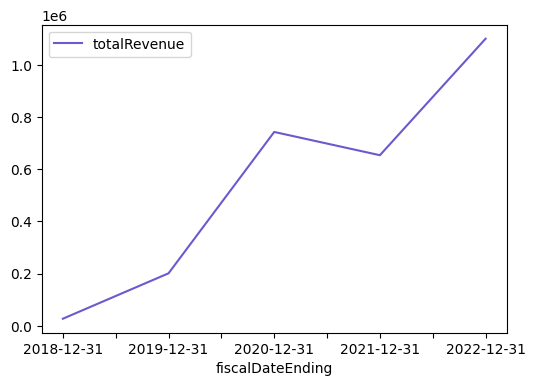

In [10]:
plot_MTC_annual_reports = MTC_stock_annual_income_statements.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y='totalRevenue', 
    color='slateblue', 
    figsize=(6, 4)
)

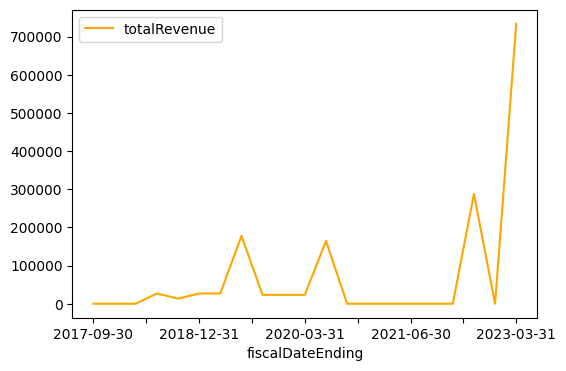

In [11]:
plot_MTC_quarterly_reports = MTC_stock_quarterly_income_statements.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y='totalRevenue', 
    color='orange', 
    figsize=(6, 4)
)

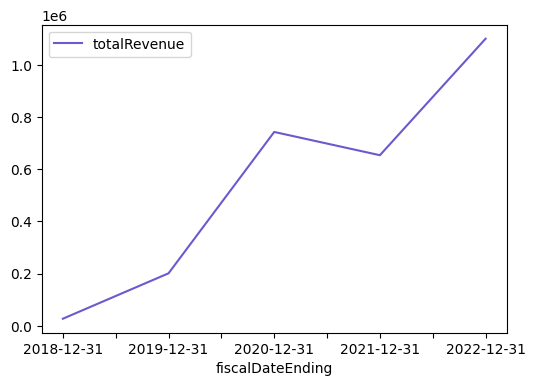

In [12]:
plot_totalRevenue_annual = MTC_stock_annual_income_statements.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y='totalRevenue', 
    color='slateblue', 
    figsize=(6, 4)
)

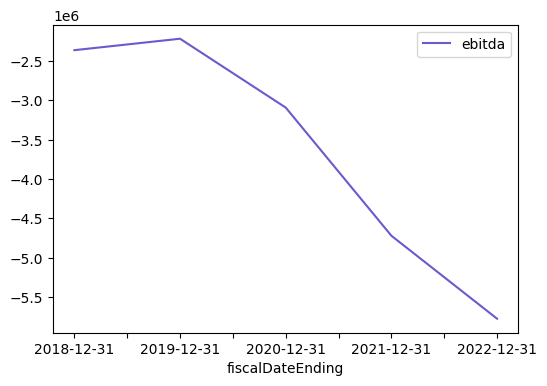

In [13]:
plot_ebitda_annual = MTC_stock_annual_income_statements.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'ebitda', 
    color='slateblue', 
    figsize=(6, 4)
)

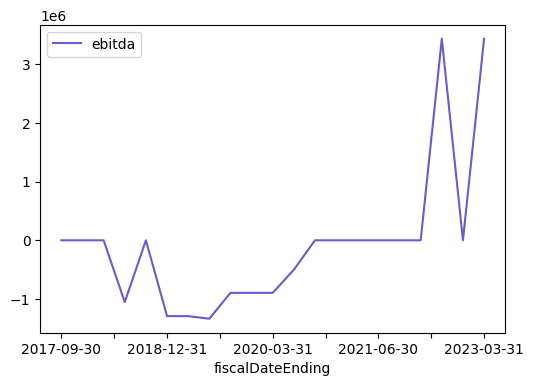

In [14]:
plot_ebitda_quarterly = MTC_stock_quarterly_income_statements.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'ebitda', 
    color='slateblue', 
    figsize=(6, 4)
)

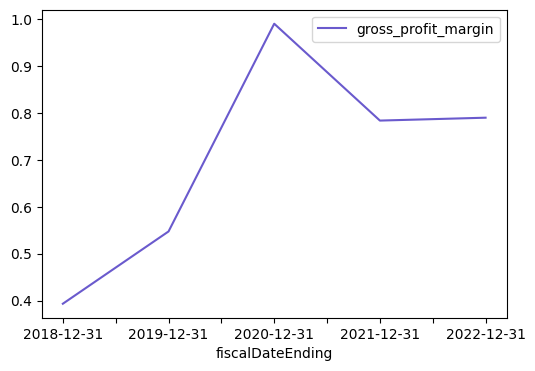

In [15]:
MTC_stock_annual_income_statements['gross_profit_margin'] = MTC_stock_annual_income_statements['grossProfit']/ MTC_stock_annual_income_statements['totalRevenue']
plot_gross_profit_margin = MTC_stock_annual_income_statements.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'gross_profit_margin', 
    color='slateblue', 
    figsize=(6, 4)
)

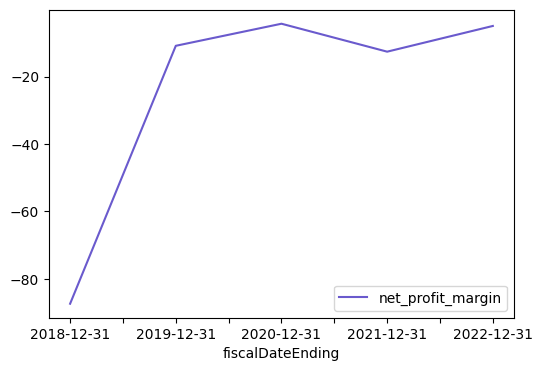

In [16]:
MTC_stock_annual_income_statements['net_profit_margin'] = MTC_stock_annual_income_statements['netIncome']/ MTC_stock_annual_income_statements['totalRevenue']
plot_gross_profit_margin = MTC_stock_annual_income_statements.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'net_profit_margin', 
    color='slateblue', 
    figsize=(6, 4)
)

#### BALANCE SHEET

In [17]:
balance_sheet_df = pd.DataFrame(balance_data)
balance_sheet_df.sample(5)

,symbol,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,period
719,HSAI,2020-12-31,CNY,1.312125e+09,1.209239e+09,2.566880e+08,2.566880e+08,1.499250e+08,0.0,1.028860e+08,...,0.000000e+00,0.000000e+00,16927000.0,7.614000e+06,1.137193e+09,0.0,-5.604600e+07,0.0,125534593.0,annualReports
3145,CDAQ,2022-12-31,USD,2.167988e+08,1.277399e+06,9.364340e+05,9.364340e+05,0.000000e+00,0.0,2.155214e+08,...,2.675000e+05,2.675000e+05,0.0,0.000000e+00,-8.355583e+06,0.0,-8.356114e+06,531.0,26550610.0,quarterlyReports
41,AA,2020-12-31,USD,1.486000e+10,4.520000e+09,1.607000e+09,1.607000e+09,1.398000e+09,556000000.0,1.098200e+10,...,2.463000e+09,2.542000e+09,525000000.0,3.363000e+09,3.311000e+09,0.0,-7.250000e+08,2000000.0,185978069.0,quarterlyReports
581,MTCH,2021-03-31,USD,3.214668e+09,1.204238e+09,8.456960e+08,8.456960e+08,0.000000e+00,210679000.0,2.010430e+09,...,3.843244e+09,3.843244e+09,208571000.0,8.437200e+07,-1.214591e+09,0.0,-8.248654e+09,270000.0,270082027.0,quarterlyReports
1424,APM,2017-12-31,USD,3.156000e+07,2.028340e+07,1.624600e+07,1.624600e+07,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,495000.0,0.000000e+00,3.024300e+07,0.0,-2.547462e+06,27864000.0,25862500.0,quarterlyReports


In [18]:
balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   symbol                                  3469 non-null   object 
 1   fiscalDateEnding                        3469 non-null   object 
 2   reportedCurrency                        3469 non-null   object 
 3   totalAssets                             3469 non-null   float64
 4   totalCurrentAssets                      3469 non-null   float64
 5   cashAndCashEquivalentsAtCarryingValue   3469 non-null   float64
 6   cashAndShortTermInvestments             3469 non-null   float64
 7   inventory                               3469 non-null   float64
 8   currentNetReceivables                   3469 non-null   float64
 9   totalNonCurrentAssets                   3469 non-null   float64
 10  propertyPlantEquipment                  3469 non-null   floa

In [19]:
balance_sheet_df.describe()

,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
count,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,...,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03,3.469000e+03
mean,3.914419e+10,5.917394e+09,3.125817e+09,3.279417e+09,9.691550e+08,4.192690e+08,1.840528e+10,4.530559e+09,1.373919e+09,4.148117e+09,...,1.219010e+09,2.098243e+09,6.270845e+09,6.742535e+09,1.106675e+09,6.334171e+09,6.385696e+08,2.730728e+09,1.249786e+09,1.072883e+11
std,2.551864e+11,3.362312e+10,2.618267e+10,2.618694e+10,6.207492e+09,1.434900e+09,9.682223e+10,2.523996e+10,5.933710e+09,1.875978e+10,...,1.347570e+10,1.020068e+10,2.878267e+10,1.761196e+11,7.132128e+09,2.765061e+10,3.474118e+09,1.474328e+10,1.705889e+10,4.453438e+12
min,0.000000e+00,0.000000e+00,-7.183228e+06,-7.183228e+06,-1.200800e+10,-2.843000e+06,0.000000e+00,-6.837620e+05,-6.396000e+06,0.000000e+00,...,-1.000000e+06,0.000000e+00,-3.926520e+11,-8.614500e+10,-1.000000e+05,-8.940000e+09,-7.488362e+09,-1.522147e+11,-4.907000e+11,0.000000e+00
25%,1.309903e+08,2.600639e+07,1.094300e+07,1.020900e+07,0.000000e+00,0.000000e+00,2.698853e+07,1.597000e+06,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.415000e+06,8.518150e+05,0.000000e+00,1.435650e+07,0.000000e+00,-1.668770e+08,1.700000e+04,1.744106e+07
50%,1.013478e+09,2.791210e+08,7.522300e+07,8.964300e+07,5.543000e+06,1.400000e+06,3.694819e+08,5.407800e+07,0.000000e+00,1.258200e+07,...,2.544870e+05,0.000000e+00,9.000000e+07,2.191900e+07,5.929000e+06,2.950360e+08,0.000000e+00,-4.132069e+06,4.940000e+05,5.432009e+07
75%,5.955100e+09,1.526632e+09,4.524410e+08,5.494400e+08,1.308550e+08,1.716720e+08,3.418335e+09,1.008000e+09,3.424800e+07,4.920287e+08,...,2.728700e+07,4.183290e+08,1.786799e+09,2.308940e+08,1.260000e+08,1.766990e+09,1.845000e+03,4.011945e+08,9.000000e+06,1.826670e+08
max,3.041476e+12,4.224370e+11,4.224370e+11,4.224370e+11,1.012870e+11,1.427100e+10,1.177923e+12,3.010245e+11,6.450000e+10,2.181460e+11,...,4.855680e+11,1.256000e+11,2.724280e+11,7.310051e+12,9.804200e+10,3.012850e+11,3.713100e+10,1.520680e+11,2.883610e+11,1.860000e+14


In [20]:
annual_balance_sheet_statements = balance_sheet_df[balance_sheet_df['period'] == 'annualReports' ]
quarterly_balance_sheet_statements = balance_sheet_df[balance_sheet_df['period'] == 'quarterlyReports' ]

In [21]:
MTC_stock_annual_balance_sheets = annual_balance_sheet_statements[annual_balance_sheet_statements['symbol'] == 'MTC'].sort_values(by = ['fiscalDateEnding'])
MTC_stock_annual_balance_sheets

,symbol,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,period
545,MTC,2018-12-31,USD,362888.0,330460.0,93625.0,93625.0,0.0,0.0,32428.0,...,0.0,239640.0,727991.0,0.0,-444285.0,-36000.0,-4132069.0,54000.0,1980000.0,annualReports
544,MTC,2019-12-31,USD,6208545.0,4347710.0,3642521.0,3642521.0,376206.0,0.0,1860835.0,...,0.0,987664.0,402923.0,0.0,4754712.0,-36000.0,-6375303.0,56070.0,2001328.0,annualReports
543,MTC,2020-12-31,USD,3710272.0,2253141.0,1425926.0,1425926.0,642536.0,0.0,1457131.0,...,0.0,786792.0,227677.0,0.0,2695803.0,0.0,-9556899.0,20820.0,2038557.0,annualReports
542,MTC,2021-12-31,USD,14587501.0,13848423.0,11206220.0,11206220.0,213526.0,0.0,739078.0,...,0.0,463819.0,648524.0,0.0,13351724.0,0.0,-16607654.0,31370.0,2450446.0,annualReports
541,MTC,2022-12-31,USD,11415507.0,9035211.0,3825477.0,3825477.0,129949.0,0.0,2380296.0,...,0.0,1053574.0,768332.0,0.0,9384351.0,0.0,-22253030.0,51451.0,5145041.0,annualReports


In [22]:
MTC_stock_quarterly_balance_sheets = quarterly_balance_sheet_statements[quarterly_balance_sheet_statements['symbol'] == 'MTC'].sort_values(by = ['fiscalDateEnding'])
MTC_stock_quarterly_balance_sheets.sample(5)

,symbol,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,...,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,period
554,MTC,2020-12-31,USD,3710272.0,2253141.0,1425926.0,1425926.0,642536.0,0.0,1457131.0,...,0.0,786792.0,227677.0,0.0,2695803.0,0.0,-9556899.0,20820.0,20820000.0,quarterlyReports
559,MTC,2019-09-30,USD,0.0,4347710.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,71854.0,0.0,0.0,0.0,-6375303.0,56070.0,2007094.0,quarterlyReports
550,MTC,2021-12-31,USD,14587501.0,13848423.0,11206220.0,11206220.0,213526.0,0.0,739078.0,...,0.0,463819.0,648524.0,0.0,13351724.0,0.0,-16607654.0,31370.0,31370000.0,quarterlyReports
564,MTC,2018-06-30,USD,1049333.0,975590.0,811916.0,811916.0,0.0,0.0,73743.0,...,0.0,0.0,146479.0,0.0,902854.0,0.0,-2845316.0,54000.0,1980000.0,quarterlyReports
562,MTC,2018-12-31,USD,362888.0,330460.0,93625.0,93625.0,0.0,0.0,32428.0,...,0.0,239640.0,727991.0,0.0,-444285.0,-36000.0,-4132069.0,54000.0,1980000.0,quarterlyReports


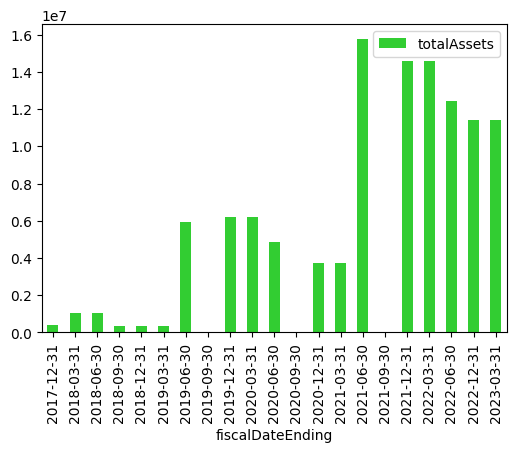

In [23]:
plot_total_assets = MTC_stock_quarterly_balance_sheets.plot(
    kind='bar', 
    x= 'fiscalDateEnding', 
    y= 'totalAssets', 
    color='limegreen', 
    figsize=(6, 4)
)

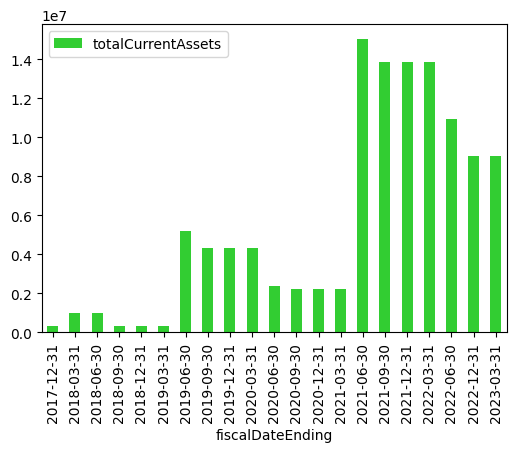

In [24]:
plot_total_current_assets = MTC_stock_quarterly_balance_sheets.plot(
    kind='bar', 
    x= 'fiscalDateEnding', 
    y= 'totalCurrentAssets', 
    color='limegreen', 
    figsize=(6, 4)
)

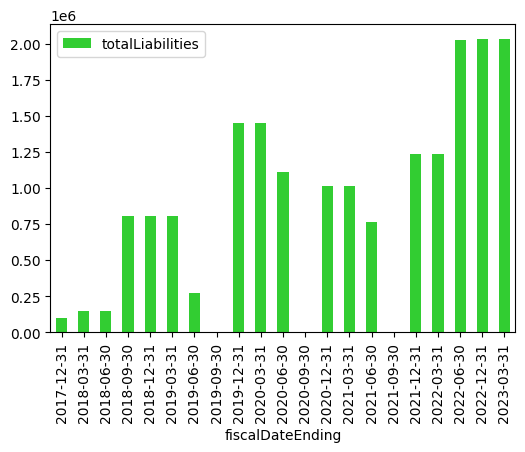

In [25]:
plot_totalLiabilities = MTC_stock_quarterly_balance_sheets.plot(
    kind='bar', 
    x= 'fiscalDateEnding', 
    y= 'totalLiabilities', 
    color='limegreen', 
    figsize=(6, 4)
)

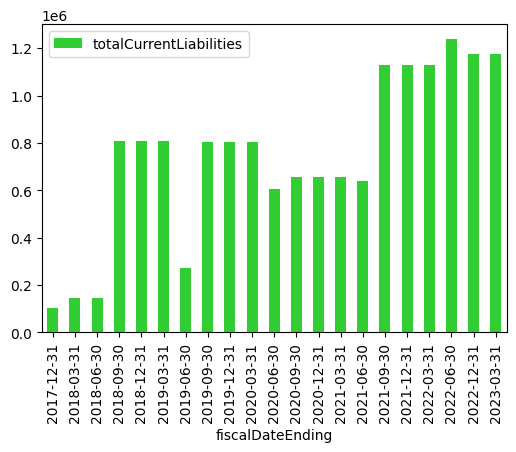

In [26]:
plot_totalCurrentLiabilities = MTC_stock_quarterly_balance_sheets.plot(
    kind='bar', 
    x= 'fiscalDateEnding', 
    y= 'totalCurrentLiabilities', 
    color='limegreen', 
    figsize=(6, 4)
)

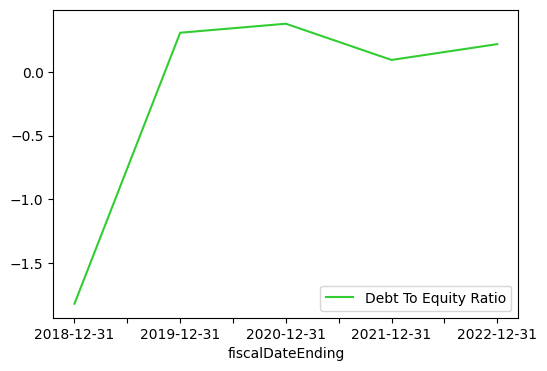

In [27]:
MTC_stock_annual_balance_sheets['Debt To Equity Ratio'] = MTC_stock_annual_balance_sheets['totalLiabilities']/MTC_stock_annual_balance_sheets['totalShareholderEquity']
plot_debtToEquityRatio = MTC_stock_annual_balance_sheets.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'Debt To Equity Ratio', 
    color='limegreen', 
    figsize=(6, 4)
)

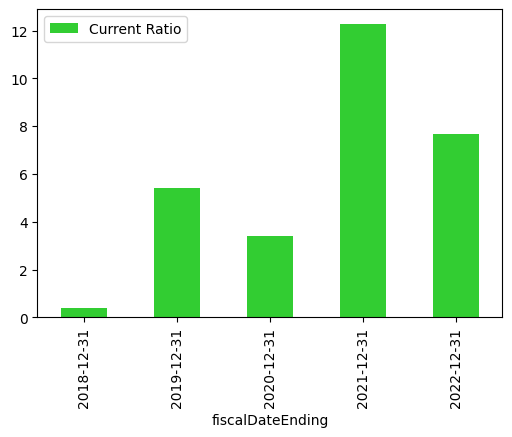

In [28]:
MTC_stock_annual_balance_sheets['Current Ratio'] = MTC_stock_annual_balance_sheets['totalCurrentAssets']/MTC_stock_annual_balance_sheets['totalCurrentLiabilities']
plot_currentRatio = MTC_stock_annual_balance_sheets.plot(
    kind='bar', 
    x= 'fiscalDateEnding', 
    y= 'Current Ratio', 
    color='limegreen', 
    figsize=(6, 4)
)

#### CASHFLOW

In [29]:
cash_flow_df = pd.DataFrame(cash_data)
cash_flow_df.sample(10)

,symbol,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,period
97,AACI,2021-09-30,USD,-5.186500e+05,0.0,0.0,113738.0,495720.0,43029.0,0.0,...,0.0,0.0,98000.0,0.0,0.000000e+00,0.0,6.438440e+05,0.0,-4.644910e+05,quarterlyReports
1183,AVHI,2021-09-30,USD,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,-2.200000e+03,0.0,-1.100000e+03,quarterlyReports
3063,AGX,2019-10-31,USD,6.906500e+07,200000.0,0.0,60511000.0,-9282000.0,1171000.0,3265000.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,-3.062000e+06,0.0,-6.855000e+06,quarterlyReports
2036,CRSP,2022-06-30,USD,-1.419560e+08,0.0,0.0,8676000.0,2502000.0,7269000.0,9630000.0,...,0.0,0.0,0.0,0.0,1.035300e+07,0.0,-1.876750e+08,0.0,-1.858340e+08,quarterlyReports
1926,BKE,2023-01-28,USD,2.423820e+08,97547000.0,0.0,-24926000.0,25485000.0,18855000.0,30360000.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,2.546260e+08,annualReports
3103,AGS,2020-09-30,USD,1.185200e+07,0.0,0.0,-5316000.0,-162000.0,20463000.0,4628000.0,...,0.0,0.0,0.0,0.0,-1.230000e+05,0.0,9.387000e+06,0.0,-1.107800e+07,quarterlyReports
1704,AGEN,2019-12-31,USD,-3.178000e+07,599000.0,0.0,-10294000.0,10898000.0,1661000.0,1056000.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,3.450200e+07,0.0,-3.085100e+07,quarterlyReports
911,DUNEU,2023-03-31,USD,9.569600e+04,10000.0,0.0,-4436147.0,-2742500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,1.208313e+06,quarterlyReports
1985,BKD,2022-06-30,USD,1.157700e+07,60034000.0,0.0,1808000.0,409000.0,88143000.0,62899000.0,...,0.0,0.0,4044000.0,0.0,0.000000e+00,0.0,-4.995100e+07,0.0,-8.441800e+07,quarterlyReports
1130,AVGO,2023-04-30,USD,4.502000e+09,397000000.0,0.0,-23000000.0,-198000000.0,162000000.0,122000000.0,...,0.0,0.0,0.0,0.0,-2.806000e+09,0.0,-1.094000e+09,0.0,3.481000e+09,quarterlyReports


In [30]:
cash_flow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   symbol                                                     3112 non-null   object 
 1   fiscalDateEnding                                           3112 non-null   object 
 2   reportedCurrency                                           3112 non-null   object 
 3   operatingCashflow                                          3112 non-null   float64
 4   paymentsForOperatingActivities                             3112 non-null   float64
 5   proceedsFromOperatingActivities                            3112 non-null   float64
 6   changeInOperatingLiabilities                               3112 non-null   float64
 7   changeInOperatingAssets                                    3112 non-null   float64
 8   deprecia

In [31]:
cash_flow_df.describe()

,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,profitLoss,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
count,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,...,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3.112000e+03,3112.0,3.112000e+03,3.112000e+03,3.112000e+03
mean,8.585252e+08,1.007399e+08,1.773550e+07,2.932402e+07,4.857666e+07,3.431524e+08,3.966911e+08,1.214928e+07,-2.776496e+07,7.843525e+07,...,2.256615e+08,1.428499e+06,-2.217195e+07,1.495062e+08,1.560557e+06,-3.293987e+07,0.0,7.273325e+07,-1.247384e+05,2.665699e+08
std,1.349923e+10,1.068713e+09,2.225141e+08,3.281908e+08,4.544426e+08,2.713570e+09,3.595828e+09,2.711856e+08,8.994391e+08,9.933365e+08,...,1.964787e+09,1.247137e+07,1.768644e+09,1.202226e+09,3.592319e+07,7.144813e+08,0.0,7.813902e+08,4.256206e+06,5.012451e+09
min,-3.182518e+10,-1.780000e+08,-2.680219e+06,-2.853000e+09,-3.477000e+09,-3.643000e+09,-9.900000e+07,-2.063000e+09,-2.332559e+10,-1.938100e+10,...,0.000000e+00,0.000000e+00,-9.846844e+10,-1.522300e+10,-2.831000e+06,-8.076000e+09,0.0,-6.912000e+09,-1.200000e+08,-1.005534e+11
25%,-4.036500e+06,0.000000e+00,0.000000e+00,-6.130000e+05,-2.425972e+05,1.998925e+05,7.483050e+04,-8.287175e+04,-3.556700e+04,-9.022500e+06,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-3.925290e+06,0.000000e+00,-1.509341e+07
50%,1.429500e+06,3.082950e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.448000e+06,4.575500e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,-3.427295e+05
75%,1.319445e+08,1.155100e+07,0.000000e+00,3.041265e+06,4.016866e+06,7.240000e+07,5.798800e+07,5.913822e+05,2.946050e+05,1.524300e+07,...,1.300000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.512500e+05,0.0,7.868500e+06,0.000000e+00,5.117975e+07
max,6.849779e+11,2.431000e+10,6.134684e+09,7.104000e+09,8.896000e+09,5.918440e+10,1.262957e+11,8.214000e+09,1.298423e+10,2.641300e+10,...,4.830000e+10,2.990000e+08,4.232017e+09,2.879300e+10,1.414000e+09,2.583000e+10,0.0,1.269000e+10,5.600000e+07,1.946253e+11


In [32]:
cash_flow_df.loc[:, (cash_flow_df != 0).any(axis=0)]

,symbol,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,period
0,A,2022-10-31,USD,1.312000e+09,85000000.0,0.0,536000000.0,569000000.0,317000000.0,291000000.0,...,250000000.0,0.0,0.0,600000000.0,0.0,-1.081000e+09,-398000000.0,0.0,1.254000e+09,annualReports
1,A,2021-10-31,USD,1.485000e+09,76000000.0,0.0,582000000.0,264000000.0,321000000.0,189000000.0,...,236000000.0,0.0,0.0,848000000.0,0.0,-7.330000e+08,43000000.0,3000000.0,1.210000e+09,annualReports
2,A,2020-10-31,USD,9.210000e+08,432000000.0,0.0,378000000.0,175000000.0,308000000.0,119000000.0,...,222000000.0,0.0,0.0,499000000.0,0.0,-4.090000e+08,59000000.0,2000000.0,7.190000e+08,annualReports
3,A,2019-10-31,USD,1.021000e+09,239000000.0,0.0,355000000.0,142000000.0,238000000.0,156000000.0,...,206000000.0,0.0,0.0,497000000.0,0.0,-6.690000e+08,-866000000.0,2000000.0,1.071000e+09,annualReports
4,A,2018-10-31,USD,1.087000e+09,182000000.0,0.0,71000000.0,148000000.0,210000000.0,177000000.0,...,191000000.0,0.0,0.0,0.0,0.0,-3.660000e+08,-431000000.0,-17000000.0,3.160000e+08,annualReports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,AGS,2019-09-30,USD,2.480600e+07,0.0,0.0,7784000.0,7777000.0,23810000.0,15917000.0,...,145000.0,0.0,0.0,0.0,0.0,-1.033000e+06,18292000.0,0.0,-5.536000e+06,quarterlyReports
3108,AGS,2019-06-30,USD,2.602000e+07,0.0,0.0,-238000.0,-1048000.0,23659000.0,11433000.0,...,100000.0,0.0,0.0,0.0,0.0,2.900000e+04,16223000.0,0.0,-7.557000e+06,quarterlyReports
3109,AGS,2019-03-31,USD,1.165500e+07,0.0,0.0,-13993000.0,-399000.0,21533000.0,16336000.0,...,57000.0,0.0,0.0,0.0,0.0,5.560000e+05,-60413000.0,0.0,-8.200000e+04,quarterlyReports
3110,AGS,2018-12-31,USD,3.219100e+07,0.0,0.0,6072000.0,-8218000.0,19751000.0,20333000.0,...,0.0,0.0,0.0,0.0,0.0,4.300000e+04,1918000.0,0.0,-1.034500e+07,quarterlyReports


In [33]:
annual_cash_flow_statements = cash_flow_df[cash_flow_df['period'] == 'annualReports' ]
quarterly_cash_flow_statements = cash_flow_df[cash_flow_df['period'] == 'quarterlyReports' ]

In [34]:
MTC_stock_annual_cash_flows = annual_cash_flow_statements[annual_cash_flow_statements['symbol'] == 'MTC'].sort_values(by = ['fiscalDateEnding'])
MTC_stock_annual_cash_flows

,symbol,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,period
565,MTC,2018-12-31,USD,-1870353.0,0.0,0.0,0.0,0.0,27311.0,23863.0,...,0.0,0.0,0.0,0.0,36000.0,0.0,0.0,0.0,-2349002.0,annualReports
564,MTC,2019-12-31,USD,-2139156.0,0.0,0.0,0.0,0.0,25839.0,129800.0,...,0.0,0.0,0.0,0.0,6851400.0,0.0,0.0,0.0,-2243234.0,annualReports
563,MTC,2020-12-31,USD,-1982847.0,0.0,0.0,0.0,0.0,54576.0,18379.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3181596.0,annualReports
562,MTC,2021-12-31,USD,-4096506.0,0.0,0.0,0.0,0.0,40130.0,37068.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7050755.0,annualReports
561,MTC,2022-12-31,USD,-5590567.0,0.0,0.0,0.0,0.0,66428.0,3792.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5645376.0,annualReports


In [35]:
MTC_stock_quarterly_cash_flows = quarterly_cash_flow_statements[quarterly_cash_flow_statements['symbol'] == 'MTC'].sort_values(by = ['fiscalDateEnding'])
MTC_stock_quarterly_cash_flows.sample(5)

,symbol,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,...,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,period
573,MTC,2020-12-31,USD,-440843.0,0.0,0.0,0.0,0.0,22119.0,3872.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1085222.0,quarterlyReports
571,MTC,2021-06-30,USD,-715737.0,0.0,0.0,0.0,0.0,7161.0,4403.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1183806.0,quarterlyReports
581,MTC,2018-12-31,USD,-826840.0,0.0,0.0,0.0,0.0,14130.0,11450.0,...,0.0,0.0,0.0,0.0,1666870.0,0.0,0.0,0.0,-1286750.0,quarterlyReports
569,MTC,2021-12-31,USD,-1332516.0,0.0,0.0,0.0,0.0,12904.0,14131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2341572.0,quarterlyReports
576,MTC,2020-03-31,USD,-462700.0,0.0,0.0,0.0,0.0,15520.0,112910.0,...,0.0,0.0,0.0,0.0,-8518270.0,0.0,0.0,0.0,-916290.0,quarterlyReports


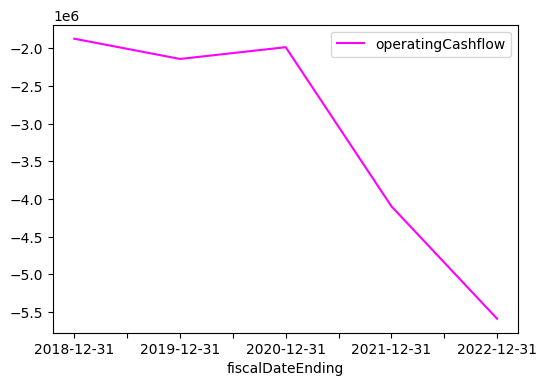

In [36]:
plot_operatingCashFlow = MTC_stock_annual_cash_flows.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'operatingCashflow', 
    color='fuchsia', 
    figsize=(6, 4)
)

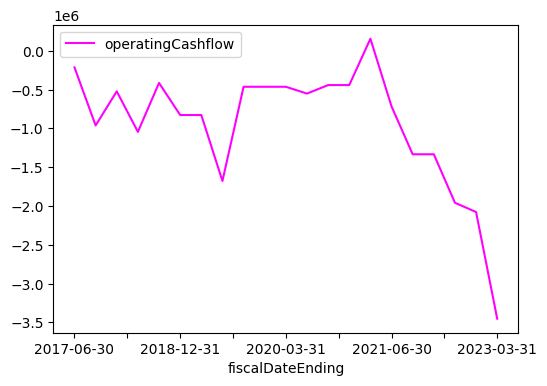

In [37]:
plot_operating_Cash_Flow_quaterly = MTC_stock_quarterly_cash_flows.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'operatingCashflow', 
    color='fuchsia', 
    figsize=(6, 4)
)

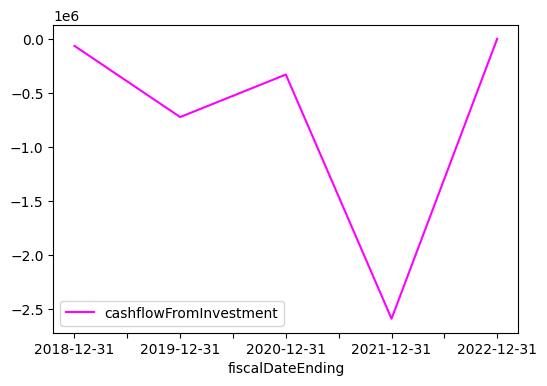

In [38]:
plot_Cash_Flow_From_Investment = MTC_stock_annual_cash_flows.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'cashflowFromInvestment', 
    color='fuchsia', 
    figsize=(6, 4)
)

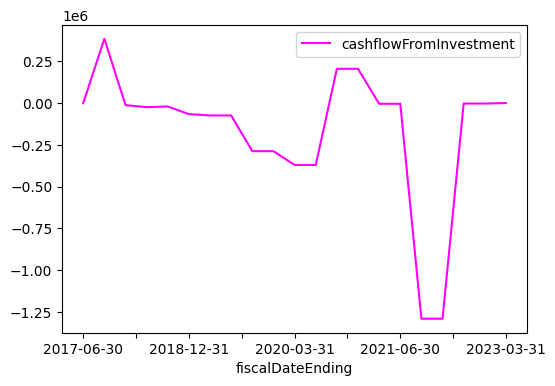

In [39]:
plot_Cash_Flow_From_Investment_quarterly = MTC_stock_quarterly_cash_flows.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'cashflowFromInvestment', 
    color='fuchsia', 
    figsize=(6, 4)
)

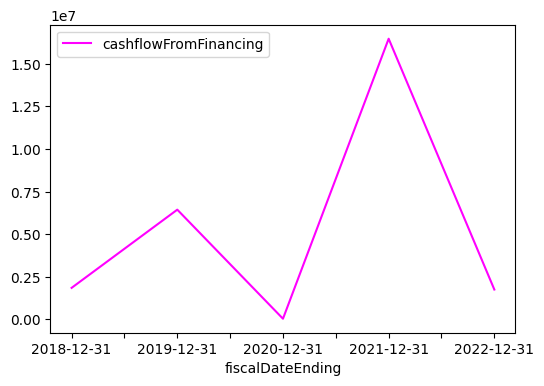

In [40]:
plot_Cash_Flow_From_Financing = MTC_stock_annual_cash_flows.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'cashflowFromFinancing', 
    color='fuchsia', 
    figsize=(6, 4)
)

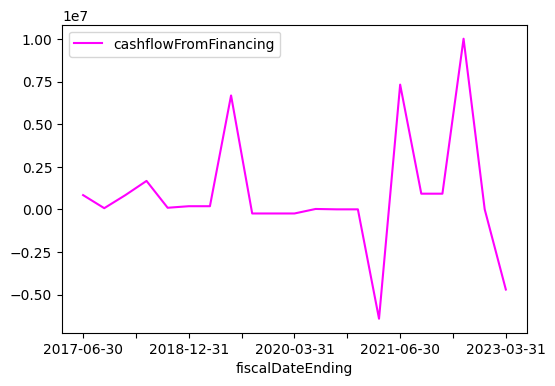

In [41]:
plot_Cash_Flow_From_Financing_quarterly = MTC_stock_quarterly_cash_flows.plot(
    kind='line', 
    x= 'fiscalDateEnding', 
    y= 'cashflowFromFinancing', 
    color='fuchsia', 
    figsize=(6, 4)
)

#### EARNINGS

In [42]:
earnings_df = pd.DataFrame(earnings_data)
earnings_df.sample(5)

,symbol,fiscalDateEnding,reportedEPS,reportedDate,estimatedEPS,surprise,surprisePercentage,period
717,TALO,2003-12-31,58.0799,2004-03-09,0.00,0.00,0.0000,quarterlyEarnings
3552,CHRD,2014-06-30,0.7000,2014-08-05,0.74,-0.04,-5.4054,quarterlyEarnings
6776,EQT,2019-12-31,0.8300,None,0.00,0.00,0.0000,annualEarnings
2639,KIRK,2023-07-31,-1.3900,2023-09-06,-1.10,-0.29,-26.3636,quarterlyEarnings
5676,BH,2021-09-30,-5.6200,2021-11-05,0.00,0.00,0.0000,quarterlyEarnings


In [43]:
earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9402 entries, 0 to 9401
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symbol              9402 non-null   object 
 1   fiscalDateEnding    9402 non-null   object 
 2   reportedEPS         9402 non-null   float64
 3   reportedDate        7468 non-null   object 
 4   estimatedEPS        9402 non-null   float64
 5   surprise            9402 non-null   float64
 6   surprisePercentage  9402 non-null   float64
 7   period              9402 non-null   object 
dtypes: float64(4), object(4)
memory usage: 587.8+ KB


In [44]:
earnings_df = earnings_df.dropna()
earnings_df.isna().sum()

symbol                0
fiscalDateEnding      0
reportedEPS           0
reportedDate          0
estimatedEPS          0
surprise              0
surprisePercentage    0
period                0
dtype: int64

In [45]:
earnings_df.describe()

,reportedEPS,estimatedEPS,surprise,surprisePercentage
count,7468.000000,7468.000000,7468.000000,7468.000000
mean,-1.134387,0.112313,-0.223912,-24.955624
std,50.469618,27.441757,13.339626,3620.094152
min,-2116.793200,-1866.000000,-906.000000,-306150.000000
25%,-0.090000,0.000000,-0.010000,0.000000
50%,0.190000,0.050000,0.000000,0.000000
75%,0.620000,0.460000,0.060000,13.801250
max,366.562200,196.630000,65.270000,38850.000000


In [46]:
annual_earnings_statements = earnings_df[earnings_df['period'] == 'annualReports' ]
quarterly_earnings_statements = earnings_df[earnings_df['period'] == 'quarterlyReports' ]

In [47]:
AMR_stock_annual_earnings = annual_earnings_statements[annual_earnings_statements['symbol'] == 'AMR'].sort_values(by = ['fiscalDateEnding'])
AMR_stock_annual_earnings

,symbol,fiscalDateEnding,reportedEPS,reportedDate,estimatedEPS,surprise,surprisePercentage,period


#### MACHINE LEARNING MODELS

In [52]:
fundamentals = [income_df, balance_sheet_df, cash_flow_df, earnings_df]
fundamentals_df = pd.concat(fundamentals)
fundamentals_df.sample(10)

,symbol,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,...,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,reportedEPS,reportedDate,estimatedEPS,surprise,surprisePercentage
900,DUNE,2022-06-30,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-168976240.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8339,CAPR,2008-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-70.0000,2008-11-13,-78.33,8.33,10.6345
4050,AGRX,2019-12-31,USD,-9000000.0,0.0,9000000.0,0.0,-18858000.0,9000000.0,9858000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8460,CAR,2004-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.2000,2004-04-19,4.10,0.10,2.4390
3540,DCBO,2019-12-31,USD,33182000.0,41443000.0,8261000.0,8261000.0,-8887000.0,16531000.0,8579000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,BAERW,2021-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2996,FNLC,2006-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.3224,2006-07-26,0.00,0.00,0.0000
8478,CAR,1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.7000,1999-10-20,3.02,-0.32,-10.5960
8581,CD,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.4800,2022-05-26,0.20,0.28,140.0000
2387,MTD,2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.9200,2017-07-27,3.90,0.02,0.5128


In [75]:
quarterly_income_statements.set_index('fiscalDateEnding', inplace=True)
quarterly_balance_sheet_statements..set_index('fiscalDateEnding', inplace=True)
fundamentals = [quarterly_income_statements, quarterly_balance_sheet_statements, quarterly_cash_flow_statements, quarterly_earnings_statements]
fundamentals_df = pd.concat(fundamentals)
fundamentals_df = fundamentals_df.sort_values(by = ['fiscalDateEnding'])
fundamentals_df.head(10)

,symbol,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,...,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,reportedEPS,reportedDate,estimatedEPS,surprise,surprisePercentage
540,MTBL,2011-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,MTBL,2012-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,MTBL,2013-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,MTBL,2014-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,MTBL,2015-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,RTC,2016-12-31,0,5465000.0,70903000.0,65438000.0,65438000.0,-12334000.0,13517000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
535,MTBL,2016-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,RTC,2017-03-31,0,3757000.0,67944000.0,64187000.0,64187000.0,-10015000.0,10266000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,TANH,2017-03-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2984104.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
179,TANH,2017-03-31,USD,998038.0,6222529.0,5224492.0,5224492.0,-57775.0,1017880.0,37932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
fundamentals_df.columns

Index(['symbol', 'fiscalDateEnding', 'reportedCurrency', 'grossProfit',
       'totalRevenue', 'costOfRevenue', 'costofGoodsAndServicesSold',
       'operatingIncome', 'sellingGeneralAndAdministrative',
       'researchAndDevelopment', 'operatingExpenses', 'investmentIncomeNet',
       'netInterestIncome', 'interestIncome', 'interestExpense',
       'nonInterestIncome', 'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome',
       'report_type', 'totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'totalNonCurrentAssets',
       'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE',
       'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill',
       'i

In [61]:
fundamentals_df.isna().sum()

symbol                   0
fiscalDateEnding         0
reportedCurrency         0
grossProfit           5249
totalRevenue          5249
                      ... 
reportedEPS           8623
reportedDate          8623
estimatedEPS          8623
surprise              8623
surprisePercentage    8623
Length: 96, dtype: int64

In [94]:
msft = yf.Ticker("MSFT")

In [95]:
msft.income_stmt.transpose()

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-06-30,0.0,0.189786,102384000000.0,-15000000.0,-15000000.0,72361000000.0,13861000000.0,65863000000.0,102384000000.0,88523000000.0,...,57529000000.0,27195000000.0,30334000000.0,22759000000.0,7575000000.0,7575000000.0,146052000000.0,65863000000.0,211915000000.0,211915000000.0
2022-06-30,0.0,0.131134,97843000000.0,334000000.0,334000000.0,72738000000.0,14460000000.0,62650000000.0,97843000000.0,83383000000.0,...,52237000000.0,24512000000.0,27725000000.0,21825000000.0,5900000000.0,5900000000.0,135620000000.0,62650000000.0,198270000000.0,198270000000.0
2021-06-30,0.0,0.138266,81602000000.0,1303000000.0,1303000000.0,61271000000.0,11686000000.0,52232000000.0,81602000000.0,69916000000.0,...,45940000000.0,20716000000.0,25224000000.0,20117000000.0,5107000000.0,5107000000.0,115856000000.0,52232000000.0,168088000000.0,168088000000.0
2020-06-30,0.0,0.16,65755000000.0,28000000.0,28000000.0,44281000000.0,12796000000.0,46078000000.0,65755000000.0,52959000000.0,...,43978000000.0,19269000000.0,24709000000.0,19598000000.0,5111000000.0,5111000000.0,96937000000.0,46078000000.0,143015000000.0,143015000000.0
